Here i attempt to enhance a dark contrast image by performing histogram matching using a high contrast reference image.  
This method is more arithmetic compared to importing packages directly

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [94]:
# Here are the image data sources
reference = cv2.imread("/Users/E1012131/Downloads/high contrast reference image.jpg") # Load reference image to match histogram with dark image
image = cv2.imread("/Users/E1012131/Downloads/dark contrast photo.webp") # Load dark contrast image


In [95]:
# histogram count of the dark image
hist_a = np.bincount(image.ravel(), minlength=256)

# normazed for PDF
pdf_a = hist_a / hist_a.sum()

# CDF of the dark image
cdf_a = np.cumsum(pdf_a)

In [96]:
# histogram count of reference image
hist_b = np.bincount(reference.ravel(), minlength=256)
pdf_b = hist_b / hist_b.sum()
cdf_b = np.cumsum(pdf_b)

In [97]:
# mapping array
mapping = np.zeros(256, dtype=np.uint8)
for i in range(256):
    diff = np.abs(cdf_a[i] - cdf_b)
    mapping[i] = np.argmin(diff)
    
matched_image = mapping[image]

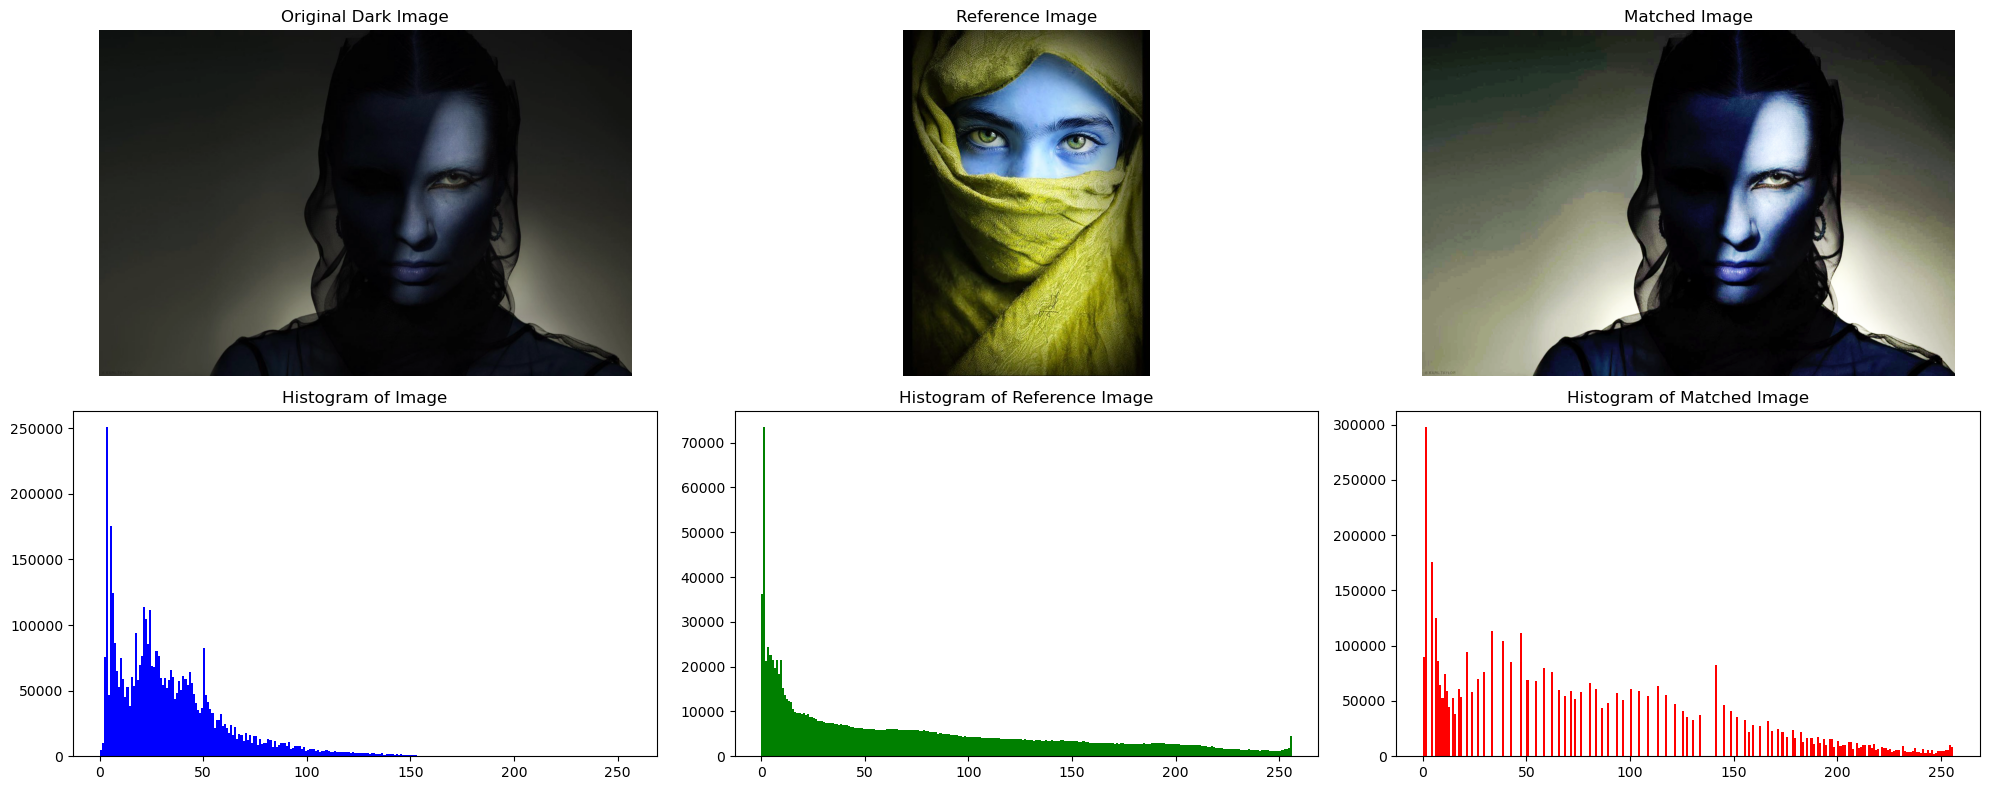

In [98]:
# To visualize the results
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
axes[0, 0].imshow(image, cmap='gray') 
axes[0, 0].set_title('Original Dark Image')
axes[0, 0].axis('off')

axes[1, 0].hist(image.ravel(), bins=256, range=(0, 256), color='blue')
axes[1, 0].set_title('Histogram of Image')

axes[0, 1].imshow(reference, cmap='gray')
axes[0, 1].set_title('Reference Image')
axes[0, 1].axis('off')

axes[1, 1].hist(reference.ravel(), bins=256, range=(0, 256), color='green')
axes[1, 1].set_title('Histogram of Reference Image')

axes[0, 2].imshow(matched_image, cmap='gray')
axes[0, 2].set_title('Matched Image')
axes[0, 2].axis('off')

axes[1, 2].hist(matched_image.ravel(), bins=256, range=(0, 256), color='red')
axes[1, 2].set_title('Histogram of Matched Image')


plt.tight_layout()
plt.show()